In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools

In [2]:
%matplotlib inline

In [21]:
data = pd.read_excel('../sales.xls')
data.head()

,Row_ID,Order_Date,Customer_Name,City,Region,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Temperature,Is_Holiday,Fuel_Price
0,1,2016-11-08,Claire Gute,Henderson,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,42.31,False,2.572
1,2,2016-11-08,Claire Gute,Henderson,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,38.51,False,2.548
2,3,2016-06-12,Darrin Van Huff,Los Angeles,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,39.93,False,2.514
3,4,2015-10-11,Sean O'Donnell,Fort Lauderdale,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,46.63,True,2.561
4,5,2015-10-11,Sean O'Donnell,Fort Lauderdale,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,46.50,False,2.625


In [22]:
def forecastSubCategory(subcat):
    df_sub = data.loc[data['Sub_Category'] == subcat]
    var_column = ['Row_ID', 'Customer_Name', 'City', 'Region', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Discount',
       'Profit', 'Temperature', 'Is_Holiday', 'Fuel_Price']
    df_sub.drop(var_column, axis=1, inplace=True)
    df_sub.sort_values('Order_Date')
    df_sub.isna().sum()
    df_sub = df_sub.groupby('Order_Date')['Quantity'].sum().reset_index()
    df_sub = df_sub.set_index('Order_Date')
    y = df_sub['Quantity'].resample('MS').mean()
    
    p = d = q = range(0, 2)
    rangePDQ = list(itertools.product(p, d, q))
    seasonalPDQ = [(x[0], x[1], x[2], 12) for x in rangePDQ]

    for p in rangePDQ:
        for seasonalp in seasonalPDQ:
            try:
                model = sm.tsa.statespace.SARIMAX(y, order=p, seasonal_order=seasonalp, enforce_stationarity=False,
                                                enforce_invertibility=False)
                modelResults = model.fit()
                print('ARIMA{}x{} - AIC:{}'.format(p, seasonalp, modelResults.aic))
            except:
                continue
    return y

In [145]:
subcatin = input()
y=forecastSubCategory(subcatin)

Copiers


F:\anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
F:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:174.74111504071513
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:121.6949638386881
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:141.9690389935986
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:61.93202137281402
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:146.85519073860956
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:136.14705468318104
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:76.84494516571412
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:63.93198061835258
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:163.81936979258458
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:108.17458873769668
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:123.78368742047248
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:62.57453173203468
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:129.68503189900116
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:109.9825328030123
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:75.04028696779513
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:64.03917286599346
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:137.76434566990935
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:94.52205377383429
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:131

F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:90.46215276928426
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:72.70857461346196
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:61.44235814477808


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [146]:
model = sm.tsa.statespace.SARIMAX(y, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
modelResults = model.fit()
print(modelResults.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6331      0.280     -2.259      0.024      -1.182      -0.084
ma.S.L12      -1.0000   2.43e+04  -4.12e-05      1.000   -4.76e+04    4.76e+04
sigma2         1.9443   4.72e+04   4.12e-05      1.000   -9.25e+04    9.25e+04


            lower Quantity  upper Quantity
Order_Date                                
2017-01-01        1.630358        9.229876
2017-02-01    -1954.658056     1965.274865
2017-03-01        1.354832        9.597034
2017-04-01        0.012557        7.036530
2017-05-01        1.637421        9.078332
2017-06-01       -0.234921        7.576522
2017-07-01        0.203838        7.862606
2017-08-01        2.563192        9.611855
2017-09-01       -0.774238        5.705152
2017-10-01        0.591702        6.967542
2017-11-01       -1.685662        4.970036
2017-12-01       -0.307377        6.056665


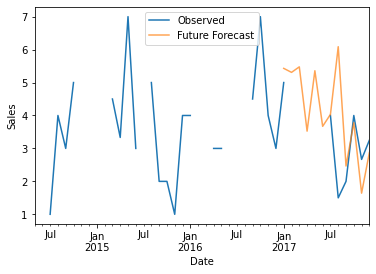

In [147]:
predictions = modelResults.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = predictions.conf_int()
print(pred_ci)
trace = y['2014':].plot(label='Observed')
predictions.predicted_mean.plot(ax=trace, label='Future Forecast', alpha=.7)
trace.set_xlabel('Date')
trace.set_ylabel('Sales')
plt.legend()
plt.show()

In [148]:
y_predicted = predictions.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error:', mse)
print('Root Mean Square Error:', np.sqrt(mse))

Mean Square Error: 3.076688811407301
Root Mean Square Error: 1.754049261396983


In [149]:
actual, pred = np.array(y_true), np.array(y_predicted)
print(actual)
print(pred)
print("MAPE",np.mean(np.abs((actual - pred) / actual)) * 100)

[5.                nan 3.33333333        nan 6.                nan
 4.         1.5        2.         4.         2.66666667 3.25      ]
[5.43011675 5.30840458 5.47593284 3.52454344 5.35787679 3.67080095
 4.03322214 6.08752362 2.46545706 3.77962228 1.64218698 2.87464398]
MAPE nan


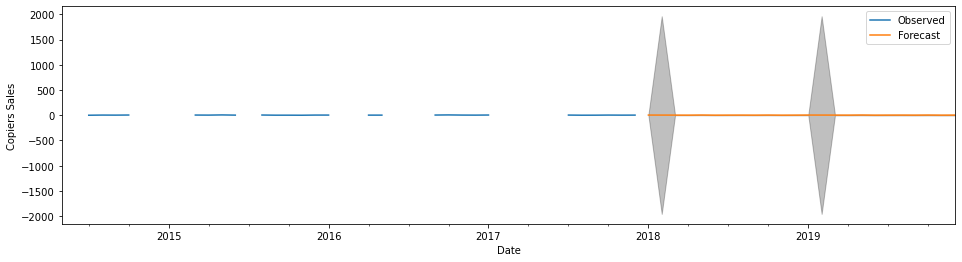

In [150]:
futurePred = modelResults.get_forecast(steps=24)
predCi = futurePred.conf_int()
ax = y.plot(label='Observed', figsize=(16, 4))
futurePred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(predCi.index,
                predCi.iloc[:, 0],
                predCi.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('{} Sales'.format(subcatin))
plt.legend()
plt.show()

In [151]:
y_forecasted = futurePred.predicted_mean
y_forecasted.head(24)

2018-01-01    4.233752
2018-02-01    3.809211
2018-03-01    3.384669
2018-04-01    2.872099
2018-05-01    5.016256
2018-06-01    2.451955
2018-07-01    3.234377
2018-08-01    3.687474
2018-09-01    2.796194
2018-10-01    4.421193
2018-11-01    2.484455
2018-12-01    3.233694
2019-01-01    4.392754
2019-02-01    3.968212
2019-03-01    3.543670
2019-04-01    3.031100
2019-05-01    5.175257
2019-06-01    2.610956
2019-07-01    3.393378
2019-08-01    3.846475
2019-09-01    2.955196
2019-10-01    4.580195
2019-11-01    2.643456
2019-12-01    3.392695
Freq: MS, Name: predicted_mean, dtype: float64

In [19]:
import json

In [152]:
y_forecasted_dic = dict(zip(y_forecasted.index.strftime("%Y-%m-%d"),y_forecasted.values))
print(y_forecasted_dic)
with open("{}_forecast.json".format(subcatin), "w") as outfile: 
    json.dump(y_forecasted_dic, outfile)

{'2018-01-01': 4.2337522067580835, '2018-02-01': 3.80921058849894, '2018-03-01': 3.3846689698668317, '2018-04-01': 2.872098835632315, '2018-05-01': 5.016255918393424, '2018-06-01': 2.451954783226206, '2018-07-01': 3.2343769182675386, '2018-08-01': 3.6874735215805927, '2018-09-01': 2.796194125639163, '2018-10-01': 4.421193137457886, '2018-11-01': 2.4844545947546917, '2018-12-01': 3.23369378728467, '2019-01-01': 4.3927536940154095, '2019-02-01': 3.968212075756266, '2019-03-01': 3.5436704571241577, '2019-04-01': 3.031100322889641, '2019-05-01': 5.1752574056507505, '2019-06-01': 2.610956270483532, '2019-07-01': 3.3933784055248646, '2019-08-01': 3.8464750088379187, '2019-09-01': 2.95519561289649, '2019-10-01': 4.580194624715212, '2019-11-01': 2.6434560820120176, '2019-12-01': 3.392695274541996}


In [153]:
ls = ["Bookcases","Chairs","Labels","Tables","Storage","Furnishings","Art","Phones","Binders","Appliances","Paper","Accessories","Envelopes","Fasteners","Supplies","Machines","Copiers"]
len(ls)

17

In [154]:
mean_mse = [0.6717577842052145,0.8537774254520566,1.5413263874061638,2.8585941960753254,
            1.0134206940707793,2.4383581262250247,2.473028832073577,0.8032565000845265,
            1.1771520720228876,0.7741281286404135,3.5047297392761476,1.2276217061478116,1.3410172404837246,
            3.5245378780995633,3.7757075361042856,6.871483874400613,3.076688811407301
           ]
np.mean(mean_mse)

2.2309757018926715

In [155]:
mean_rmse = [0.8196083114544499,0.9240007713481935,1.2415016662921414,1.6907377667974788,
            1.0066879824805595,1.5615242957523987,1.5725866691771162,0.8962457810693039,
             1.0849663921167731,0.8798455140764277,1.8720923426145804,1.1079809141622483,
             1.1580229878908814,1.8773752629934068,1.9431179933561127,2.621351535830441,
             1.754049261396983
            ]
np.mean(mean_rmse)

1.412452673459382

In [ ]:
mean_Mape = [22.730463594245577,13.695795461727982,21.08634260821859,26.220909109820262,16.09758435401679,28.96544984673576,
            21.260844402610356,12.586977282052372,10.021908410567573,14.82210657651611,16.412207219160823,14.36296895435536,
             24.88289341627827,
            ]